In [1]:
# Setting up environment
from datetime import datetime
import pandas as pd
from arcgis.gis import GIS
from arcgis.apps import workforce
import arcgis
from IPython.display import display

In [2]:
# Connect to GIS
gis = GIS("pro", verify_cert=False)

In [3]:
# Double Check
print(gis)

GIS @ https://gis.gha-engineers.com/portal/ version:10.1


<Item title:"Round Lake Beach Work Order" type:Feature Layer Collection owner:rjoas@gha_engineers.com>
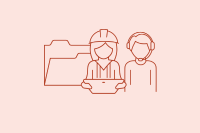

In [4]:
# Access Survey123 Form
item = gis.content.get("6fb406d580a548439adcfe731de68cb6")
display(item)

In [5]:
# Access Workforce Project
project = arcgis.apps.workforce.Project(item)
display(project)

<Project Round Lake Beach Work Order>

In [6]:
# Access Survey123 Feature Layer
layer = gis.content.get("5376ecf1d37d47f5ab2e464c39b90fde")
print(layer)

<Item title:"Form 4" type:Feature Layer Collection owner:rjoas@gha_engineers.com>


In [7]:
# Setting Environment
from arcgis.geocoding import geocode

In [9]:
assignments = []
display(assignments)

[]

In [10]:
# Identify Layer
layer_item = layer.layers[0].query().sdf
layer_item

,comments,created_user,globalid,appointment,priority,dateofworkordersubmission,requestedby,last_edited_user,contactinfo,name,last_edited_date,location,created_date,customername,objectid,SHAPE
0,Dead Rabbit,rjoas@gha_engineers.com,{DFB8B5B4-A52A-4BC3-8A41-2A412C5A1FA6},2023-05-19 16:00:00,3,2023-05-18 17:00:00,Parks Department,rjoas@gha_engineers.com,karen@dodge.com,Deceased Animal Pick UP,2023-05-18 17:05:02.157999,"704 E Clarendon Dr, Round Lake Beach, IL 60073",2023-05-18 17:05:02.157999,Karen,2,"{""x"": -88.06635259799998, ""y"": 42.378246569, ""..."


In [11]:
project_assignments = []

In [12]:
# Project Assignment Settings
for feature in layer.layers[0].query():
    assignments.append(
        workforce.Assignment(
            project,    
            geometry=feature.geometry,
            location=feature.attributes["location"],
            description=feature.attributes["comments"],
            priority=2,
            assignment_type="Work Order",
            status="unassigned"
        )
    )

In [14]:
# Create New Assignment
project.assignments.batch_add(assignments)

KeyError: 0